In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import classification_report

%matplotlib inline

# Loading Data + Splitting

X = all columns except what we are trying to predict

y = column we are trying to predict

We split our dataset into a test and train set. We use the train set to train our model, meaning 

In [2]:
from sklearn.model_selection import train_test_split

#This function will split the dataset into training and testing sets
def split(dataset, target_col):
    data_train, data_test = train_test_split(dataset, test_size=0.2, random_state=4, shuffle=True)

    #X_train = sm.add_constant(data_train.drop(columns=[target_col]))
    X_train = data_train.drop(columns=[target_col])
    y_train = data_train[target_col]

    #X_test = sm.add_constant(data_test.drop(columns=[target_col]))
    X_test = data_test.drop(columns=[target_col])
    y_test = data_test[target_col]
    return X_train, X_test, y_train, y_test

The next dataset we will be using is the wine quality database from the 1990 Ashenfelter wine predictions. In this dataset, we are measuring:
wine quality

In [3]:
#Import dataset
wine_data = pd.read_csv("142a/Datasets/wine_agg.csv")

X_train_w, X_test_w, y_train_w, y_test_w = split(wine_data, "LogAuctionIndex")
X_train_w.head()

,Year,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
22,1977,755.2,87.3,15.92,17.24,38,53.15,10.47
37,1992,487.8,341.6,18.00,17.34,23,57.24,8.47
12,1967,646.9,118.1,16.51,17.16,48,49.55,9.03
42,1997,460.5,112.2,19.10,19.96,18,58.21,8.07
26,1981,497.8,110.9,17.28,18.54,34,54.18,10.95


Next we will be loading in the diabetes dataset from the UCI Machine Learning Repository.
This is a dataset where the outcome is:

0. If diabetes was not detected in the patient.
1. If diabetes was detected.

So we will be using this for our __Classification Models__

In [4]:
#Import dataset
diabetes_data = pd.read_csv("142a/Datasets/diabetes_dataset.csv")

X_train_d, X_test_d, y_train_d, y_test_d = split(diabetes_data, "Outcome")
X_train_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
596,0,67,76,0,0,45.3,0.194,46
90,1,80,55,0,0,19.1,0.258,21
734,2,105,75,0,0,23.3,0.560,53
694,2,90,60,0,0,23.5,0.191,25
517,7,125,86,0,0,37.6,0.304,51


# VIFs

### Multicolinearity
- Occurs when two or more predictors are highly correlated
- Makes the estimated coefficients $\hat{\beta} = (\hat{\beta_0}, \hat{\beta_1}, \ldots , \hat{\beta_p})$ very sensitive to noise in the training data
  - Thus can produce very inaccurate estimates which hurts interpretability and possibly predictive performance
- Tell-tale signs:
  - Some of the estimated coefficients have the “wrong” sign
  - Some of the coefficients are not significantly different from zero
- Multicollinearity can usually be fixed by deleting one or more independent variables


Higher values of VIF imply that the variable is colinear with other features in the dataset. We can use these values to decide which variables to delete from our model!

### Variance Inflation Factor (VIF)
Even before we start training or testing a model, we can measure the colinearity 

- Consider regressing each predictor variable $X_j$ on all of the others:
  $$
  X_j = \alpha_0 + \alpha_1 X_1 + \ldots + \alpha_{j-1}X_{j-1} + \alpha_{j+1}X_{j+1} + \ldots + \alpha_p X_p
  $$
- If the $R^2$ for the above (call it $R^2_j$) is equal to 1, then there exists a perfect linear relationship between $X_j$ 
  and all other independent variables according to the training data
- So, define:
  $$
  \text{VIF}_j = \frac{1}{1 - R^2_j}
  $$

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
#Look at VIFs for each feature of a dataset
def vifs(X_train):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_train.columns[1:len(X_train.columns)]  # Exclude the constant column
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i+1) for i in range(6)]
    return vif_data

# Creating a Base Model
Steps to creating a model:
1. Initialize the model.

We initialize the model by calling it from SKLearn's library and assigning it to a variable!

2. Train the model.

The fit() function in both StatsModels and SKLearn is used to train the model based on the data we are passing into it.
We ONLY use our training data for training the model.
We will see later another way to increase accuracy in our dataset by accounting for bias.

3. Test the model on the test set.

The train() function does this!


There are many different types of models to choose from when analyzing data. Each has their own benefits that will be explained below.
#### Regression Models:
If predicting a continuous response variable. Examples: Housing prices, weather.

Ex: Linear Regression, 

#### Classification Models:
If predicting a yes/no outcome. Examples: Identify spam emails, spot cancer cells, 

Ex: Logistic Regression, K-Nearest Neighbors, 

## Linear Regression Models

Linear Regression can be performed with a few different types of regression models. These include: Ordinary Least Squares, Least Absolute Deviations, Ridge, 

### Ordinary Least Squares

#### Using SciKitLearn
Use SciKitLearn for better model accuracy & faster computations.

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize the model
ols_model = LinearRegression()

# Fit the model (assuming X_train and y_train are your training data)
ols_model.fit(X_train_w, y_train_w)

# Predict using the model
y_pred_ols = ols_model.predict(X_test_w)

### Ridge 

In [8]:
from sklearn.linear_model import Ridge

# Initialize the model (alpha controls regularization strength)
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train_w, y_train_w)

# Predict using the model
y_pred_ridge = ridge_model.predict(X_test_w)


## Model Evaluation
We can make regression models interpretable by getting some values from it. Here, we will calculate our Mean Squared Error (R^2). This takes the difference between every prediction on and the actual result from the test set, then takes the mean of those differences and squares it.

In [9]:
# Calculate R-squared for OLS
r_squared_ols = r2_score(y_test_w, y_pred_ols)
r_squared_ols

# Calculate R-squared for Ridge
r_squared_ridge = r2_score(y_test_w, y_pred_ridge)
r_squared_ridge

print("Mean Squared Error OLS: " + str(r_squared_ols) + "\nMean Squared Error Ridge: " + str(r_squared_ridge))

Mean Squared Error OLS: 0.7244691423337968
Mean Squared Error Ridge: 0.7181167964358038


# Classification Models
Classification modeling: logistic regression, linear discrimative analysis, KNN, and CART.

### Logistic Regression



#### Using SciKitLearn

In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the model (for binary classification, default solver is 'lbfgs')
logreg_model = LogisticRegression(max_iter=1000)

# Fit the model
logreg_model.fit(X_train_d, y_train_d)

# Predict using the model
y_pred_logreg = logreg_model.predict(X_test_d)

### Linear Discriminant Analysis

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the model
lda_model = LinearDiscriminantAnalysis()

# Fit the model
lda_model.fit(X_train_d, y_train_d)

# Predict using the model
y_pred_lda = lda_model.predict(X_test_d)

### K Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model (n_neighbors controls the number of neighbors to consider)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train_d, y_train_d)

# Predict using the model
y_pred_knn = knn_model.predict(X_test_d)

### Classification and Regression Trees (CART)

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model (you can use DecisionTreeRegressor for regression)
cart_model = DecisionTreeClassifier()

# Fit the model
cart_model.fit(X_train_d, y_train_d)

# Predict using the model
y_pred_cart = cart_model.predict(X_test_d)

## Model Evaluation.
In order to evaluate the performance of our classification model, we can make use of confusion matrix to compute a variety of useful metric Other metrics include taking the accuracy_score and the Receiver Operating Characteristic (ROC) curve. 

The confusion matrix    [tn fp]
                        [fn tp]

The ROC curve plots the true positive rate against the false positive rate of the model. This tells us the tradeoff between FPR and TPR at different thresholds for our classification. For most classification problems we might decide on 0.5 (if there is 50% chance of predicting a yes), and change it depending on the  circumstances under which we are classifying.

The area under curve (AUC) is used to quantify the quality of a test. The model with greater area under the curve is generally the better one.


The Naive Baseline that is plotted below is simply flipping a coin on each prediction, so there is a 50% chances of being correct at any point.

                 Logistic Regression  LDA
True Negatives                    90   88
False Positives                   12   14
False Negatives                   17   18
True Positives                    35   34


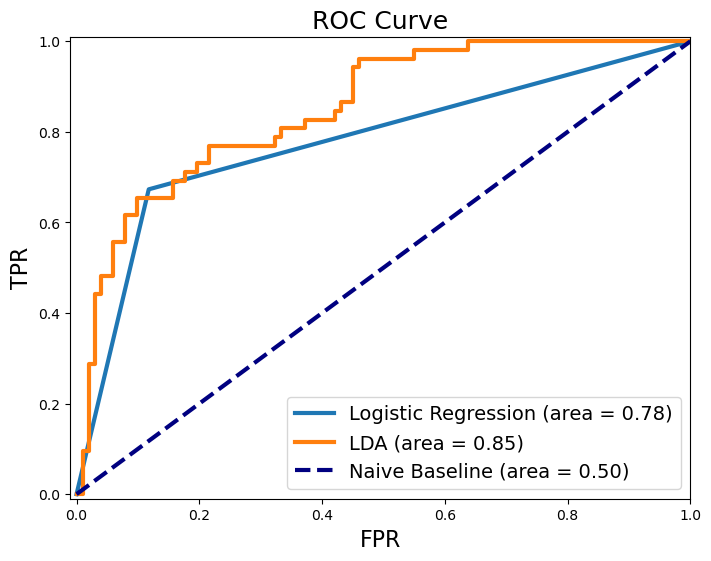

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

#Logistic Regression
y_pred_log = logreg_model.predict(X_test_d)

tn_log, fp_log, fn_log, tp_log = confusion_matrix(y_test_d, y_pred_log).ravel()
conf_mat_log = pd.DataFrame({'True Negatives': tn_log, 'False Positives': fp_log, 'False Negatives': fn_log, 'True Positives': tp_log}, index=[0])

fpr_log, tpr_log, _ = roc_curve(y_test_d, y_pred_log)
roc_auc_log = auc(fpr_log, tpr_log)


#LDA 
y_prob_lda = lda_model.predict_proba(X_test_d)

tn_lda, fp_lda, fn_lda, tp_lda = confusion_matrix(y_test_d, y_pred_lda).ravel()
conf_mat_lda = pd.DataFrame({'True Negatives': tn_lda, 'False Positives': fp_lda, 'False Negatives': fn_lda, 'True Positives': tp_lda}, index=[0])

fpr_lda, tpr_lda, _ = roc_curve(y_test_d, y_prob_lda[:,1])
roc_auc_lda = auc(fpr_lda, tpr_lda)

#Confusion Matrices
conf_matrices = pd.DataFrame({'Logistic Regression': conf_mat_log.values.flatten(), 'LDA': conf_mat_lda.values.flatten()}, index=['True Negatives', 'False Positives', 'False Negatives', 'True Positives'])
print(conf_matrices)

#Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_log, tpr_log, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc_log))
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()